
# 🧪 Module 9 Lab – Link Analysis (PageRank, HITS, TrustRank)

**Course:** Information Retrieval and Web Search  
**Objective:** Implement and analyze link analysis algorithms (PageRank, HITS, TrustRank) on sample graphs.

---


## <font color='red'>Submission: Submit both .ipynb file and .ipynb converted to PDF</font>
## <font color='blue'>Submissions with following cases will get a zero</font>
* ## <font color='red'>Code or commented text truncated from the pdf version of the notebook</font>
* #### <font color='blue'>Any compilation error in the notebook</font>
* #### <font color='blue'>Missing output for any of the programming cells. There should be an output for every code cell</font>
---

## Part A: PageRank

### Q1. Graph Construction & Transition Matrix
- Construct an adjacency matrix for a directed graph of 5 pages with arbitrary links.
- Convert this adjacency matrix into a column-stochastic transition matrix.

---


In [1]:
#Code
import numpy as np
from numpy.linalg import norm

# Define adjacency matrix for 5 pages (A–E)
# Example links: A→B, A→C, B→C, C→A, C→D, D→C, E→A
# Convention: Row = source page, Column = destination page
A = np.array([
    [0, 1, 1, 0, 0],  # A links to B, C
    [0, 0, 1, 0, 0],  # B links to C
    [1, 0, 0, 1, 0],  # C links to A, D
    [0, 0, 1, 0, 0],  # D links to C
    [1, 0, 0, 0, 0]   # E links to A 
])

# Another example
A2 = np.array([
    [0, 1, 0, 1, 1],  
    [0, 0, 0, 0, 1],  
    [1, 1, 0, 1, 1],  
    [0, 0, 1, 0, 0],  
    [0, 0, 0, 0, 0]   
])

def stochastic_matrix(mtrx):
    mtrx = mtrx.astype(float)
    out_deg = mtrx.sum(axis=0)

    # handling 0 columns
    for j in range(mtrx.shape[1]):
        if out_deg[j] != 0:
            mtrx[:,j] /= out_deg[j]
    return mtrx

In [2]:
# Column stochastic matrix
stochastic_matrix(A)

array([[0.        , 1.        , 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.        ],
       [0.5       , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.        ],
       [0.5       , 0.        , 0.        , 0.        , 0.        ]])

In [3]:
stochastic_matrix(A2)

array([[0.        , 0.5       , 0.        , 0.5       , 0.33333333],
       [0.        , 0.        , 0.        , 0.        , 0.33333333],
       [1.        , 0.5       , 0.        , 0.5       , 0.33333333],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

### Q2. Basic PageRank Iteration
- Implement the **Power Iteration method** to compute PageRank scores.
- Run until convergence (tolerance = 1e-6).
- Print the final scores for each page.

---

In [4]:
#Code
def pagerank(A, alpha=0.85, max_iter=100, tol=1e-6):
    N = A.shape[0]
    start_rank = np.ones(N)/N
    trans_mtrx = stochastic_matrix(A)

    for i in range(max_iter):
        rank = alpha*trans_mtrx@start_rank + (1-alpha)/N

        if norm(rank - start_rank, ord=1) < tol:
            return rank

        start_rank = rank

    return rank

In [5]:
pagerank(A, alpha=0.85, max_iter=100, tol=1e-6)

array([0.132785  , 0.07177562, 0.1474431 , 0.07177562, 0.08643373])

In [6]:
pagerank(A2, alpha=0.85, max_iter=100, tol=1e-6)

array([0.20384407, 0.0385    , 0.37711127, 0.35054466, 0.03      ])

### Q3. Dangling Node Handling
- Modify your PageRank implementation to correctly handle dangling nodes (pages with no out-links).
- Compare results with a flawed implementation where dangling nodes are ignored.
- Explain the difference in rank distribution.

---


In [7]:
#Code
def pagerank_dangle(A, alpha=0.85, max_iter=100, tol=1e-6):
    N = A.shape[0]
    start_rank = np.ones(N)/N
    trans_mtrx = stochastic_matrix(A)

    # Handling dangle nodes
    trans_mtrx[:, trans_mtrx.sum(axis=0)==0] = 1.0 / N

    # convergence Number
    conv = 0
    
    for i in range(max_iter):
        rank = alpha*trans_mtrx@start_rank + (1-alpha)/N

        if norm(rank - start_rank, ord=1) < tol:
            return rank, conv

        start_rank = rank
        conv += 1

    return rank, conv

In [8]:
pagerank_dangle(A, alpha=0.85, max_iter=100, tol=1e-6)

(array([0.26025399, 0.14067779, 0.28898332, 0.14067779, 0.16940711]), 14)

In [9]:
pagerank_dangle(A2, alpha=0.85, max_iter=100, tol=1e-6)

(array([0.20384407, 0.0385    , 0.37711127, 0.35054466, 0.03      ]), 26)

We see that when we add handling dangling nodes, that the 0 columns in our column-stochastic matrix have values added into it which makes the column sum to 1 as it should. This means that our pagerank vector probabilities all sum to 1 as well (in our previous pagerank function, it was around 0.501 which is not correct).

### Q4. Effect of Damping Factor
- Experiment with different damping factors (α = 0.65, 0.85, 0.95).
- Plot convergence speed and final rank distribution for each case.
- Discuss how the damping factor influences stability and fairness.

---

Text(0.5, 1.0, 'Rank distribution per alpha')

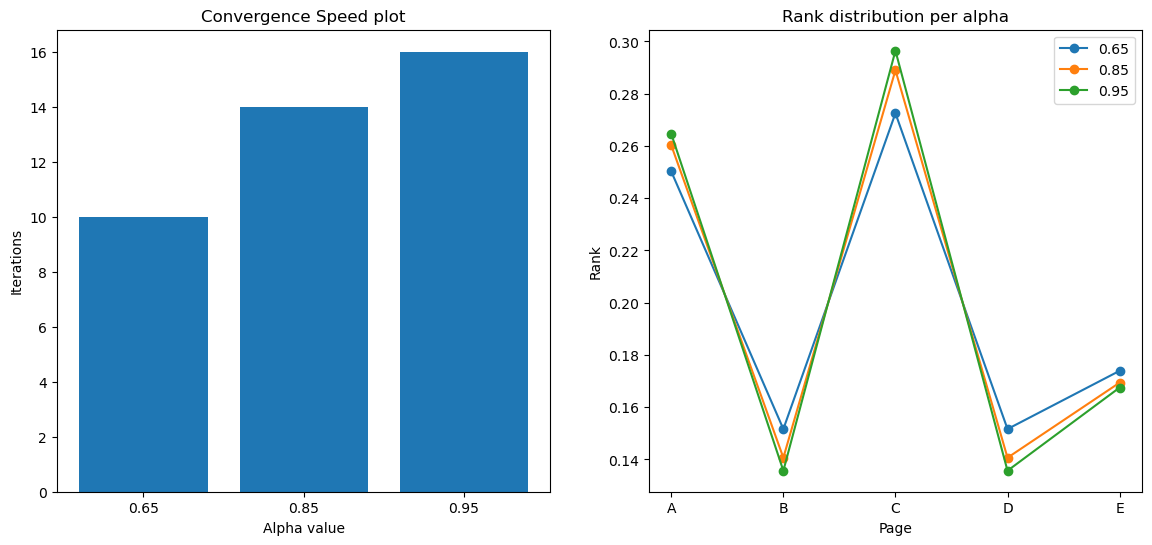

In [10]:
#Code
import matplotlib.pyplot as plt

alphas = [0.65, 0.85, 0.95]
pages = ['A','B','C','D','E']
res_dict = {}

for alpha in alphas:
    rank, conv = pagerank_dangle(A, alpha=alpha)
    res_dict[alpha] = {'rank': rank, 'iters': conv}

fig, axes = plt.subplots (1,2, figsize=(14,6))

plt.subplot(1,2,1)
iters = [res_dict[alpha]['iters'] for alpha in alphas]
plt.bar([str(alpha) for alpha in alphas], iters)
plt.xlabel('Alpha value')
plt.ylabel('Iterations')
plt.title('Convergence Speed plot')

plt.subplot(1,2,2)
for alpha in alphas:
    plt.plot(pages, res_dict[alpha]['rank'],marker='o', label=f"{alpha}")
plt.xlabel('Page')
plt.ylabel('Rank')
plt.legend()
plt.title('Rank distribution per alpha')

We can see for the damping factor, the lower the parameter is, the quicker convergence it gets. A lower damping factor also seems more stable. If we look at the rank distribution graph, we notice that the higher the alpha, the more extreme the distribution gets. This means that tiny changes can heavily effect the rankings with a higher alpha value. 

## Part B: HITS (Hubs and Authorities)

### Q5. HITS Implementation
- Implement the HITS algorithm using iterative updates for **authority** and **hub** scores.
- Normalize scores at each iteration using the L2 norm.
- Run until convergence and print the final hub and authority scores.

---


In [11]:
#Code
def HITS(mtrx, max_iter=100, tol=1e-6):
    N = mtrx.shape[0]
    # initial scores
    hub = np.ones(N)
    auth = np.ones(N)

    for i in range(max_iter):
        auth_new = mtrx.T @ hub
        hub_new = mtrx @ auth

        # normalize
        auth_new /= norm(auth_new)
        hub_new /= norm(hub_new)

        if norm(hub_new-hub) < tol and norm(auth_new-auth) < tol:
            return auth_new, hub_new

        hub, auth = hub_new, auth_new
    return auth, hub

In [12]:
auth, hub = HITS(A)
print(f"Authority score for A: {auth}")
print()
print(f"Hub score for A: {hub}")

Authority score for A: [2.00403455e-06 3.82683432e-01 9.23879533e-01 1.23856146e-06
 0.00000000e+00]

Hub score for A: [7.07106781e-01 5.00000000e-01 1.53382164e-06 5.00000000e-01
 9.47953905e-07]


In [13]:
auth, hub = HITS(A2)
print(f"Authority score for A2: {auth}")
print()
print(f"Hub score for A2: {hub}")

Authority score for A2: [2.81845191e-01 5.22720721e-01 3.25932066e-07 5.22720721e-01
 6.11628470e-01]

Hub score for A2: [6.31781280e-01 2.33191972e-01 7.39238743e-01 2.69668398e-07
 0.00000000e+00]


### Q6. Comparison with PageRank
- For the same graph, compare the highest-ranked page by PageRank, HITS Authority, and HITS Hub.
- Explain why PageRank is **query-independent** while HITS is **query-dependent**.

---

In [14]:
#Code
auth, hub = HITS(A)
pr = pagerank_dangle(A)
print(f"Authority score for A: {auth}")
print()
print(f"Hub score for A: {hub}")
print()
print(f"Pagerank score for A: {pr[0]}")

Authority score for A: [2.00403455e-06 3.82683432e-01 9.23879533e-01 1.23856146e-06
 0.00000000e+00]

Hub score for A: [7.07106781e-01 5.00000000e-01 1.53382164e-06 5.00000000e-01
 9.47953905e-07]

Pagerank score for A: [0.26025399 0.14067779 0.28898332 0.14067779 0.16940711]


We see that in pagerank, our highest ranked page is C, in HITS auth our highest ranked page is C, and in HITS hub the highest ranked page is A.

We notice that C is high in pagerank since it has a high probability to get pointed at by other pages, and high auth because it is pointed at by other higher hubs. It has low hub because it points to low authority pages.

Pagerank is query-independent because it uses the entire graph (the corpus), meaning it does not use any queries to narrow the graph down. HITS on the other hand is computed for each query. It uses a subset of pages which means different query = different HITS scores.

### Q7. Subgraph Selection
- Simulate a query by selecting a small “root set” of pages.
- Expand it into a “base set” (include in-neighbors and out-neighbors).
- Run HITS on this subgraph and compare results with the full graph.

---

In [15]:
#Code
# using B 
# index pos
root_set = [1]

# using this for expansion
base_set = set(root_set)

for page in root_set:
    # in neighbour
    in_n = np.where(A[:, page]==1)[0].tolist()
    base_set.update(in_n)

    out_n = np.where(A[page, :]==1)[0].tolist()
    base_set.update(out_n)

base_set = sorted(list(base_set))
base_set

[0, 1, 2]

In [16]:
# get subgraph from base set
sg = A[base_set,:][:,base_set]
sg

array([[0, 1, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [17]:
#HITS
auth, hub = HITS(sg)
print(f"Authority score for subgraph: {auth}")
print()
print(f"Hub score for subgraph: {hub}")

Authority score for subgraph: [1.02236768e-06 5.25731112e-01 8.50650808e-01]

Hub score for subgraph: [8.50650808e-01 5.25731112e-01 1.02236768e-06]


In [18]:
auth, hub = HITS(A)
print(f"Authority score for full graph: {auth}")
print()
print(f"Hub score for full graph: {hub}")

Authority score for full graph: [2.00403455e-06 3.82683432e-01 9.23879533e-01 1.23856146e-06
 0.00000000e+00]

Hub score for full graph: [7.07106781e-01 5.00000000e-01 1.53382164e-06 5.00000000e-01
 9.47953905e-07]


Compared to the full graph, the hub score and auth score are different, we notice that pages D and E are not going to be in the subgraph. hub score for page A changed a lot since A is more of a "hub" in the subgraph, a more important source pointing to authorities.

## Part C: TrustRank

### Q8. Seed Set Initialization
- Select a small set of trusted seed pages (e.g., government or university sites).
- Modify your PageRank implementation so teleportation occurs only to these seed pages.

---

In [19]:
#Code
def trustrank(A, seed_pages, alpha=0.85, max_iter=100, tol=1e-6):
    N = A.shape[0]
    start_rank = np.ones(N)/N
    trans_mtrx = stochastic_matrix(A)

    # Handling dangle nodes
    trans_mtrx[:, trans_mtrx.sum(axis=0)==0] = 1.0 / N

    # teleport to seed pahes
    trust = np.zeros(N)
    trust[seed_pages] = 1/ len(seed_pages)
    
    
    for i in range(max_iter):
        rank = alpha*trans_mtrx@start_rank + (1-alpha)*trust

        if norm(rank - start_rank, ord=1) < tol:
            return rank

        start_rank = rank

    return rank


### Q9. Trust Propagation
- Compute TrustRank scores for the graph.
- Compare them with standard PageRank scores.
- Identify which pages are demoted due to lack of connection to trusted seeds.

---


In [20]:
# lets say B and C are trusted
trustrank(A,[1,2])

array([0.26600448, 0.18432672, 0.30413492, 0.10932672, 0.13620716])

In [21]:
pagerank_dangle(A)[0]

array([0.26025399, 0.14067779, 0.28898332, 0.14067779, 0.16940711])

As we can see in trustrank, since we put B and C as trusted sources, they promoted their scores while D and E got heavily demoted due to their lower connection to B and C.

### Q10. Spam Mass Estimation
- Define **Spam Mass** as the difference between a page’s PageRank and TrustRank.
- Write a function to compute Spam Mass for each page.
- Interpret which pages are likely spam or low-quality.

---

In [22]:
def spam_mass(A, seed):
    trust = trustrank(A,seed)
    page = pagerank_dangle(A)[0]

    # normalized diff
    return (page - trust) / page

In [23]:
# lets say B and C are trusted
spam_mass(A,[1,2])

array([-0.02209568, -0.31027593, -0.05243072,  0.22285727,  0.19597734])

Negative values mean that the trustrank score for the page is higher than pagerank, this means that A, B, and C are not spam. E and especially D have high positive values meaning they are low-quality pages given our trusted sources.


## Part D: Advanced Challenges

### Q11. Visualization
- Plot the graph using `networkx`.
- Visualize PageRank, HITS, and TrustRank scores as node sizes.
- Compare visually how each algorithm distributes importance.

---

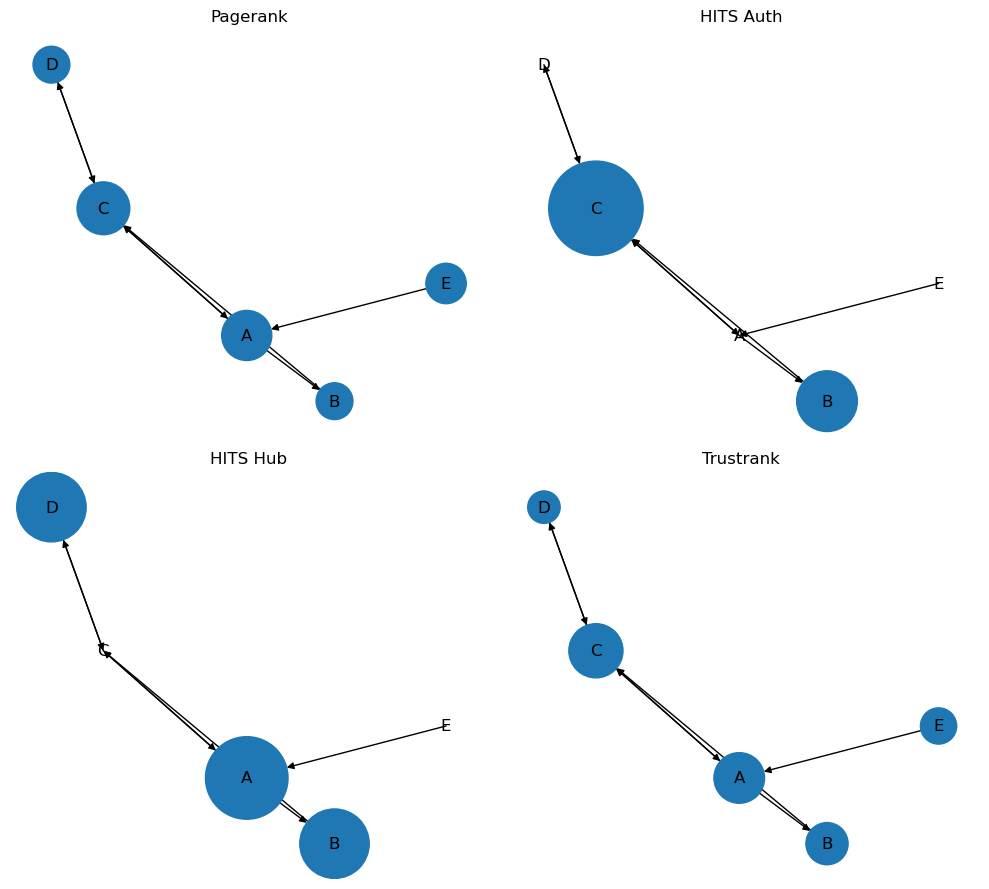

In [24]:
import networkx

grph = networkx.DiGraph()
for i in range(len(pages)):
    for j in range(len(pages)):
        if A[i,j]==1:
            grph.add_edge(pages[i], pages[j])

# scores
pagerank = pagerank_dangle(A)[0]
auth, hub = HITS(A)
trustrank_s = trustrank(A, [1,2])

# Plot
fig, axes = plt.subplots(2, 2, figsize=(10, 9))
pos = networkx.spring_layout(grph, seed=42)

networkx.draw(grph,pos, node_size=pagerank*5000, with_labels=True, ax=axes[0,0])
axes[0,0].set_title('Pagerank')

networkx.draw(grph, pos, node_size=auth*5000, with_labels=True, ax=axes[0,1])
axes[0,1].set_title('HITS Auth')

networkx.draw(grph,pos, node_size=hub*5000, with_labels=True, ax=axes[1,0])
axes[1,0].set_title('HITS Hub')

networkx.draw(grph, pos, node_size=trustrank_s*5000, with_labels=True, ax=axes[1,1])
axes[1,1].set_title('Trustrank')

plt.tight_layout()
plt.show()

We see that from our graph, it is hard to tell what pagerank supports, but it seems like its mostly A or C.

Auth score is heavily C while Hub score is A followed by B or D.

For trustrank, it is noticeable that D and E got slightly smaller, while C,B,A got only slightly bigger.

### Q12. Scalability Experiment
- Generate a random directed graph with 1000 nodes.
- Run PageRank and HITS on this graph.
- Measure runtime and convergence speed.
- Discuss scalability challenges and possible optimizations.

---

In [25]:
# generate graph
graph = np.random.rand(1000,1000) < 0.01
graph = graph.astype(int)

In [26]:
import time
# Adding runtime and convergence
def HITS_runtime(mtrx, max_iter=100, tol=1e-6):
    N = mtrx.shape[0]
    # initial scores
    hub = np.ones(N)
    auth = np.ones(N)
    start = time.time()
    # convergence Number
    conv = 0
    
    for i in range(max_iter):
        auth_new = mtrx.T @ hub
        hub_new = mtrx @ auth

        # normalize
        auth_new /= norm(auth_new)
        hub_new /= norm(hub_new)

        if norm(hub_new-hub) < tol and norm(auth_new-auth) < tol:
            end = time.time()
            return auth_new, hub_new, conv, end-start

        hub, auth = hub_new, auth_new
        conv += 1
    end=time.time()
    return auth, hub, conv, end-start

def pagerank_runtime(A, alpha=0.85, max_iter=100, tol=1e-6):
    N = A.shape[0]
    start_rank = np.ones(N)/N
    trans_mtrx = stochastic_matrix(A)

    # Handling dangle nodes
    trans_mtrx[:, trans_mtrx.sum(axis=0)==0] = 1.0 / N
    start = time.time()
    # convergence Number
    conv = 0
    
    for i in range(max_iter):
        rank = alpha*trans_mtrx@start_rank + (1-alpha)/N

        if norm(rank - start_rank, ord=1) < tol:
            end=time.time()
            return rank, conv, end-start

        start_rank = rank
        conv += 1
    end=time.time()
    return rank, conv, end-start

In [27]:
auth, hub, con_hits, run_hits = HITS_runtime(graph, max_iter=1000)
rank, con_pr, run_pr = pagerank_runtime(graph, max_iter=1000)

In [28]:
print(f"convergence for HITS: {con_hits}")
print()
print(f"runtime for HITS: {run_hits}")

convergence for HITS: 20

runtime for HITS: 0.15521955490112305


In [29]:
print(f"convergence for PAGERANK: {con_pr}")
print()
print(f"runtime for PAGERANK: {run_pr}")

convergence for PAGERANK: 10

runtime for PAGERANK: 0.034897804260253906


The algorithms seem quite scalabale since they were able to compute 1000 node graphs quite fast. The convergence is lower than our original graph probabily because it is random and doesnt have a structure like ours. The scalability seems simple enough but it may add up for 1,000,000 pages or even more. Google has millions of web pages which give these algorithms a scalability challenge.

### Q13. Reflection and Extension

Write a structured summary of your findings for each of the questions from **Q1 to Q12**. For each technique or function you implemented, address the following aspects:

- **Weaknesses of the technique and discuss the output of your implementation for each question**  
  Identify limitations, edge cases, or scenarios where the technique may fail or produce unreliable results.

- **Strengths of the technique**  
  Highlight what the technique does well, including its efficiency, simplicity, or effectiveness in typical use cases.

- **Improvement opportunities**  
  Explain how addressing the identified weaknesses could enhance the technique’s accuracy, scalability, or robustness.

**Instructions:**

- <font color='red'>Format your answers as separate paragraphs for each question (Q1 to Q12).</font>
- <font color='red'>Use headings or bold labels to clearly identify each question.</font>
- <font color='red'>Ensure your report includes meaningful insights and examples from your implementation.</font>
- <font color='red'>Use markdown formatting to keep your notebook organized and readable.</font>

---

### Q1
Building a stochastic matrix is useful for finding probability of in-links and out-links of pages in our web graph.  One weakeness is it is necessary to know if it is row or column stochastic, because if that gets mixed up then the entire structure of the transition matrix becomes meaningless. ANother weakness is 0 value rows and columns because dividing by those becomes an issue later on. One improvement would also be to hand 0 value rows/ columns by adding an arbritrary value in them which sum to 1 and doesnt affect any future computation.

### Q2
This basic pagerank algorithm is strong with ranking pages in a webgraph. It gives pretty accurate scores on which webpages are more relevant compared to the rest based on the link structure. It is not good when a page has 0 outlinks and doesnt give a good answer (where all probabilities should equal to 1 does not happen). One improvement would be to handle those nodes that have 0 outlinks.

### Q3
Dangling node handling answers the previous issue with nodes with no outlinks, so its strength is it is more accurate than the previous algorithm. One issue it might have is that computation time grows quite a lot because of the looping in the function. One improvement might be to find a solution which will give lower computation time for larger graphs.

### Q4
damping factor is a good balance between the link structure and the concept of teleportation to handle cycles and disconnects for convergence. Weakness is that it is quite tunable and would need a couple of trials between alpha values to find the perfect balance, this may take much longer on larger web graphs. We can implement a set of random alphas rangind from 0-1 and pick out  like 10 of them and compute the best value, instead of iteratively going through every possible alpha.

### Q5
HITS is good in distingushing pages that link to high quality pages and pages themselves that are high quality. this difference is more detailed than page rank as we can see different pages serve different purposes. it is also query dependent which narrows down the webgraph. One weakness is that it can probably be inflated with a tight knit form of pages all linking to eachother. A fully connected graph would have high auth and hub even if they're not realisitically high quality. Adding filters may help this weakness, such as filtering out spam pages.

### Q6
We see that PageRank and HITS have quite similar rankings where C is highly ranked, it is good to use both to make further decisions.

### Q7
subgraph selection is good as it focuses on selected set of pages which influence if HIT scores to show which page (C) is more authoritative and whatever else is a hub (A). The results depend on the root set selection so if in the real world that is innacurately selected, the subgraph won't be strong. Applying machine learning to find a good root set may be a good improvement.

### Q8
trust rank is good such that we get to choose manually trusted sites, which boost the scores of good sites, and lower any spam pages, making it harder for spam sites to manipulate. Its weakness is it also depends on the seed selected, and disproportionizes scores of sites that are trusted but arent in the seed. A regular update of the seed may help improve this algorithm, manually removing and adding pages based on their quality improvement/ degration.

### Q9
We see that trustrank does good in improving our trusted sites rank (B and C) anddemoting scores of spam pages (D and E)

### Q10
Finding the difference between trustrank and page rank is good to numerically analyze which pages are spam and which pages are trusted sites. We see that A, B, and C are trusted while D and E were not. its weakness as mentioned before is that sites that are trusted but not in the seed may have inflated values. We would want to regularly update the seed such that the spam estimation is accurate consistently.

### Q11
Visualizing using networkx really shows how different each algorithm works and seeing all the differences. it is slightly hard to see the page rank and trustrank differences visually even though they are prevalent numerically, one fix might be to add some colour changed to further exemplify the differences between algorithms.

### Q12
In our 1000 node graph we saw that the runtime and convergence were quite quick, possibly due to the fact that the graph had no real structure. One weakness may be that growing to a million or even a billion webpages might be too much compute. The solution for that may be to do subgraph selection so we can narrow down webpages.